<a href="https://colab.research.google.com/github/smahesh2694/NEU_CLS-64/blob/master/xai_tl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install -q xlrd

In [0]:
 #!git clone https://smahesh2694:@github.com/smahesh2694/NEU_CLS-64.git

In [73]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.optimizers import Adam

In [76]:
base_model=MobileNet(weights='imagenet',include_top=False, input_shape= (200, 200, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
#x=Dense(1024,activation='relu')(x)
#x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x) 
preds=Dense(6,activation='softmax')(x)

In [0]:
model=Model(inputs=base_model.input, outputs=preds)

In [0]:
base_model.trainable = False #default

In [0]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True, 
                                 validation_split=0.1)

In [0]:
bs = 32

In [82]:
train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/NEU surface defect database',  #NEU-CLS-64
                                                 target_size=(200,200),     
                                                 batch_size=bs,
                                                 class_mode='categorical',                                                 
                                                 shuffle=True,
                                                 subset='training')

Found 1628 images belonging to 6 classes.


In [83]:
val_generator=train_datagen.flow_from_directory('/content/drive/My Drive/NEU surface defect database', 
                                                 target_size=(200,200),  
                                                 #batch_size=32,                                                                                                batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')

Found 180 images belonging to 6 classes.


In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

In [0]:
model.summary()

In [86]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)
step_size_val=val_generator.n//val_generator.batch_size
print(step_size_val)

50
5


In [0]:
initial_epochs = 20

In [88]:
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=val_generator,
                   validation_steps=step_size_val,                
                   epochs=initial_epochs)

Epoch 1/20
50/50 [==============================] - 33s 668ms/step - loss: 0.2402 - acc: 0.9349 - val_loss: 4.4451 - val_acc: 0.6625
Epoch 2/20
50/50 [==============================] - 24s 488ms/step - loss: 0.1830 - acc: 0.9649 - val_loss: 5.4325 - val_acc: 0.6284
Epoch 3/20
50/50 [==============================] - 24s 487ms/step - loss: 0.1248 - acc: 0.9743 - val_loss: 0.2215 - val_acc: 0.9865
Epoch 4/20
50/50 [==============================] - 24s 479ms/step - loss: 0.0805 - acc: 0.9792 - val_loss: 0.3732 - val_acc: 0.9459
Epoch 5/20
50/50 [==============================] - 23s 468ms/step - loss: 0.1345 - acc: 0.9668 - val_loss: 2.0405 - val_acc: 0.7297
Epoch 6/20
50/50 [==============================] - 24s 477ms/step - loss: 0.1067 - acc: 0.9775 - val_loss: 1.6569 - val_acc: 0.8378
Epoch 7/20
50/50 [==============================] - 24s 479ms/step - loss: 0.0420 - acc: 0.9919 - val_loss: 0.0253 - val_acc: 0.9875
Epoch 8/20
50/50 [==============================] - 25s 498ms/step - 

In [0]:
#print(history.history.keys())

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

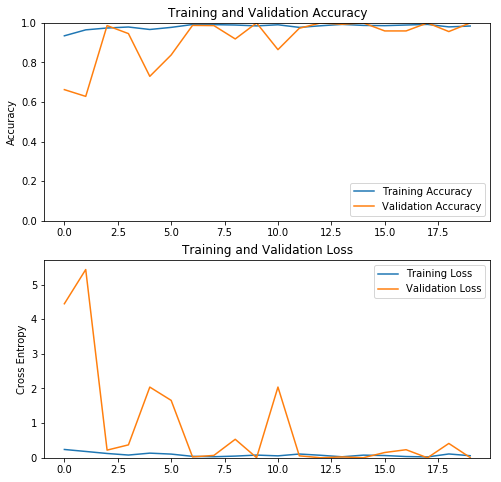

In [91]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.savefig('/content/drive/My Drive/xai_model/MN_90_10_13.jpg')
plt.show()



In [0]:
model.save('/content/drive/My Drive/xai_model/model.h5')

In [0]:
model.save_weights('/content/drive/My Drive/xai_model/weights.h5')

In [0]:
#lm = load_model('/content/drive/My Drive/xai_model/model.h5')

In [0]:
#lm.summary()

In [0]:
#from keras.preprocessing.image import load_img, img_to_array
#from keras.applications.mobilenet import preprocess_input, decode_predictions
#image = load_img('/content/drive/My Drive/xai_model/Sc_7.bmp')

In [0]:
#image = img_to_array(image)
# reshape data for the model
#image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
#image = preprocess_input(image)
#yhat = model.predict(image)


In [0]:
# convert the probabilities to class labels
#label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
#label = label[0][0]
# print the classification
#print('%s (%.2f%%)' % (label[1], label[2]*100))

In [0]:
base_model.trainable = True

In [107]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  87


In [0]:
fine_tune_at = 61

In [0]:
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [0]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['acc'])

In [103]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 201, 201, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 100, 100, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 100, 100, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 100, 100, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 100, 100, 32)      128 

In [104]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data=val_generator,
                   validation_steps=step_size_val,                
                   epochs=total_epochs,
                   initial_epoch = initial_epochs)

Epoch 21/30
50/50 [==============================] - 26s 525ms/step - loss: 0.0192 - acc: 0.9944 - val_loss: 0.0346 - val_acc: 0.9812
Epoch 22/30
50/50 [==============================] - 21s 417ms/step - loss: 0.0507 - acc: 0.9905 - val_loss: 0.0520 - val_acc: 0.9865
Epoch 23/30
50/50 [==============================] - 21s 412ms/step - loss: 0.0398 - acc: 0.9937 - val_loss: 0.0177 - val_acc: 1.0000
Epoch 24/30
50/50 [==============================] - 21s 413ms/step - loss: 0.0602 - acc: 0.9906 - val_loss: 0.0158 - val_acc: 0.9932
Epoch 25/30
50/50 [==============================] - 20s 393ms/step - loss: 0.0771 - acc: 0.9869 - val_loss: 0.0118 - val_acc: 0.9932
Epoch 26/30
50/50 [==============================] - 20s 395ms/step - loss: 0.0174 - acc: 0.9944 - val_loss: 0.1170 - val_acc: 0.9932
Epoch 27/30
50/50 [==============================] - 20s 403ms/step - loss: 0.0301 - acc: 0.9956 - val_loss: 0.0076 - val_acc: 1.0000
Epoch 28/30
50/50 [==============================] - 21s 425ms

In [0]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

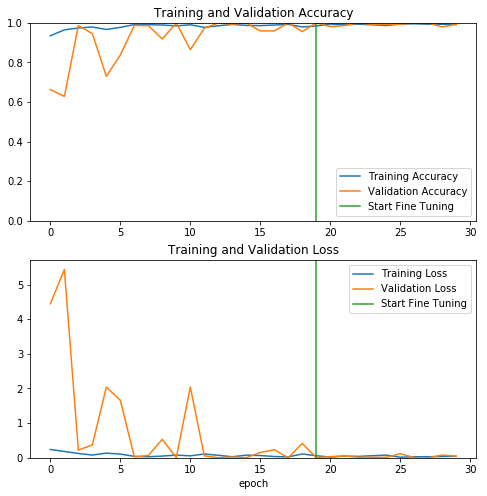

In [106]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, max(plt.ylim())])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.savefig('/content/drive/My Drive/xai_model/MN_FT_90_10_13.jpg')
plt.show()